In [ ]:
import torch
import numpy as np

# Тензоры

Тензоры — это структура данных, очень похожая на массивы и матрицы. В PyTorch мы используем тензоры для кодирования входных и выходных данных модели, а также параметров модели

Тензоры очень похожи на ndarrays в NumPy, за исключением того, что тензоры могут работать на графических процессорах (видеокартах) или других аппаратных ускорителях. Тензоры также оптимизированы для автоматического дифференцирования (подробнее об этом мы поговорим позже в разделе **Autograd**)

## Инициализация тензора

Тензоры можно инициализировать различными способами. Рассмотрим несколько примеров:

### Напрямую из данных

In [ ]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

In [ ]:
x_data

tensor([[1, 2],
        [3, 4]])

### Из NumPy array

In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [ ]:
x_np

tensor([[1, 2],
        [3, 4]])

### Из другого тензора

Новый тензор сохраняет свойства (форму, тип данных) тензора аргумента, если они не переопределены явно:

In [ ]:
x_data

tensor([[1, 2],
        [3, 4]])

In [ ]:
x_ones = torch.ones_like(x_data)  # сохраняет свойства x_data
print(f"Ones Tensor: \n {x_ones} \n")


# дз
x_ones2 = torch.ones_like(x_data, dtype=torch.float)  # переписывает тип данных x_data
print(f"Ones Float Tensor (): \n {x_ones2} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # переписывает тип данных x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Ones Float Tensor (): 
 tensor([[1., 1.],
        [1., 1.]]) 

Random Tensor: 
 tensor([[0.0157, 0.8706],
        [0.9820, 0.9448]]) 



### Рандомными или константными значениями


**shape** представляет собой кортеж (tuple) тензорных измерений. В функциях ниже он определяет размерность выходного тензора.

In [ ]:
shape = (2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.3901, 0.6928, 0.2367],
        [0.8135, 0.6405, 0.8970]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


**Задание (1 балл):**
Создайте тензор, состоящий из нулей с 4 столбцами и 2 строками



In [ ]:
zeros_4_2 = torch.zeros(2, 4, dtype = int)

print(f"Zeros 4 by 2 Tensor: \n {zeros_4_2}")

Zeros 2 by 4 Tensor: 
 tensor([[0, 0, 0, 0],
        [0, 0, 0, 0]])


**Задание (1 балл):**
Создайте тензор, состоящий из случайных значений с плавающей точкой с 2 столбцами и 5 строками

In [ ]:
random_2_5 = torch.rand(5, 2)

print(f"Random 2 by 5 Tensor: \n {random_2_5}")

Random 2 by 5 Tensor: 
 tensor([[0.3460, 0.7050],
        [0.9402, 0.0948],
        [0.0646, 0.0395],
        [0.5073, 0.0333],
        [0.8499, 0.9736]])


## Атрибуты тензора


Атрибуты тензора описывают их форму, тип данных и устройство, на котором они хранятся

In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Операции над тензорами

[Здесь](https://pytorch.org/docs/stable/torch.html) подробно описаны более 100 тензорных операций, включая арифметические, операции линейной алгебры, манипуляции с матрицами (транспонирование, индексирование, слайсинг), выборку и многое другое.

Каждую из этих операций можно выполнить на графическом процессоре (gpu, гпу), и почти всегда это работает на порядок быстрее, чем те же вычисления на центральном процессоре (cpu, цпу).

**Берем gpu в Colab**<br>
Среда выполнения -> Сменить среду выполнения -> GPU.


По умолчанию тензоры создаются на cpu. Нам нужно явно переместить тензоры на gpu с помощью метода **.to** (после проверки доступности gpu). Имейте в виду, что копирование больших тензоров на разные устройства может потребовать больших затрат времени и памяти


In [ ]:
# Перемещаем тензор на gpu, если gpu имеется
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

In [ ]:
tensor

tensor([[0.7520, 0.1154, 0.7878, 0.8655],
        [0.2101, 0.8359, 0.9651, 0.7781],
        [0.6347, 0.0274, 0.4009, 0.6610]], device='cuda:0')

In [ ]:
tensor + tensor

tensor([[1.5040, 0.2308, 1.5756, 1.7309],
        [0.4202, 1.6718, 1.9302, 1.5561],
        [1.2694, 0.0548, 0.8017, 1.3220]], device='cuda:0')

In [ ]:
# и переведем обратно на cpu
tensor = tensor.to("cpu")

**Задание (1 - 3 балла):** выберите 1-3 (по 1 баллу за каждую операцию) новых для вас операций над тензорами [отсюда](https://pytorch.org/docs/stable/torch.html), опишите их и примените к каким-нибудь новым тензорам

+1 балл, если все операции выполняете на gpu

In [ ]:
tensor = torch.rand(3, 4)

if torch.cuda.is_available():
    tensor = tensor.to("cuda")

print(f"First tensor before:\n {tensor}\n")

#Логарифмируем тензор по основанию 10
tensor = torch.log10(tensor)
print(f"First tensor after log10:\n {tensor}\n")

print(f"Shape of tensor before: {tensor.shape}\n")

#Транспонируем тензор
tensor = tensor.T
print(f"First tensor after transposing:\n {tensor}\n")

print(f"Shape of tensor after: {tensor.shape}\n")

#Берём модуль от элементов тензора
tensor = torch.abs(tensor)
print(f"First tensor after abs:\n {tensor}\n")

First tensor before:
 tensor([[0.0033, 0.8998, 0.8954, 0.6068],
        [0.6611, 0.1511, 0.4302, 0.7191],
        [0.4958, 0.4057, 0.7770, 0.7535]], device='cuda:0')

First tensor after log10:
 tensor([[-2.4878, -0.0458, -0.0480, -0.2169],
        [-0.1797, -0.8207, -0.3663, -0.1432],
        [-0.3047, -0.3918, -0.1096, -0.1229]], device='cuda:0')

Shape of tensor before: torch.Size([3, 4])

First tensor after transposing:
 tensor([[-2.4878, -0.1797, -0.3047],
        [-0.0458, -0.8207, -0.3918],
        [-0.0480, -0.3663, -0.1096],
        [-0.2169, -0.1432, -0.1229]], device='cuda:0')

Shape of tensor after: torch.Size([4, 3])

First tensor after abs:
 tensor([[2.4878, 0.1797, 0.3047],
        [0.0458, 0.8207, 0.3918],
        [0.0480, 0.3663, 0.1096],
        [0.2169, 0.1432, 0.1229]], device='cuda:0')



## Еще больше операций над тензорами

### Индексация, слайсинг

In [ ]:
tensor = torch.ones(4, 4)
print(tensor)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


### Присоединение тензоров

In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


### Арифметические операции

In [ ]:
tensor

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [ ]:
# Умножаем матрицы: y1, y2, y3 будут одинаковыми
# ``tensor.T`` возвращает транспонированную матрицу

y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)
y1, y2, y3

(tensor([[3., 3., 3., 3.],
         [3., 3., 3., 3.],
         [3., 3., 3., 3.],
         [3., 3., 3., 3.]]),
 tensor([[3., 3., 3., 3.],
         [3., 3., 3., 3.],
         [3., 3., 3., 3.],
         [3., 3., 3., 3.]]),
 tensor([[3., 3., 3., 3.],
         [3., 3., 3., 3.],
         [3., 3., 3., 3.],
         [3., 3., 3., 3.]]))

In [ ]:
# Поэлементное умножение. z1, z2, z3 будут одинаковыми
z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)
z1, z2, z3

(tensor([[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]]),
 tensor([[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]]),
 tensor([[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]]))

### Тензоры с одним значением


In [ ]:
# Если наш тензор состоит из одного значения, то можем конвертнуть его в значение в Python через .item()
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


### In-place операции



In [ ]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


## Из тензора в NumPy array

In [ ]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


Будьте аккуратны! Они ссылаются на один адрес в памяти, поэтому, изменяя тензор, будет изменяться и NumPy array

In [ ]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


И наборот:

In [ ]:
n += 1
print(f"t: {t}")
print(f"n: {n}")

t: tensor([3., 3., 3., 3., 3.])
n: [3. 3. 3. 3. 3.]


**Задание (2 балла)** <br>
Подумайте, как мы можем избежать такого поведения

Найдите решение (можете в том числе гуглить)

In [ ]:
t = torch.ones(5)
print(f"t: {t}")
n = t.clone().numpy()
print(f"n: {n}\n")

t.add_(1)
print(f"t: {t}")
print(f"n: {n}\n")

n += 1
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]

t: tensor([2., 2., 2., 2., 2.])
n: [1. 1. 1. 1. 1.]

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


# Автоматические дифференцирование с torch.autograd



При обучении нейронных сетей наиболее часто используемый алгоритм — обратное распространение ошибки (back propogation или просто backprop). В этом алгоритме параметры (веса модели) корректируются (изменяются) в соответствии с градиентом функции потерь по отношению к данному параметру.

Для вычисления этих градиентов в PyTorch есть встроенный механизм дифференциации под названием torch.autograd. Он поддерживает автоматическое вычисление градиента для любого вычислительного графа.

Рассмотрим простейшую однослойную нейронную сеть с входными данными **x**, параметрами **w** и **b** и некоторой функцией потерь. Его можно определить в PyTorch следующим образом:

In [ ]:
import torch

x = torch.ones(5)  # входной тензор
y = torch.zeros(3)  # ожидаемый тензор на выходе
w = torch.randn(5, 3, requires_grad=True)  # можем поставить requires_grad при создании тензора, а можем потом с помощью x.requires_grad_(True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

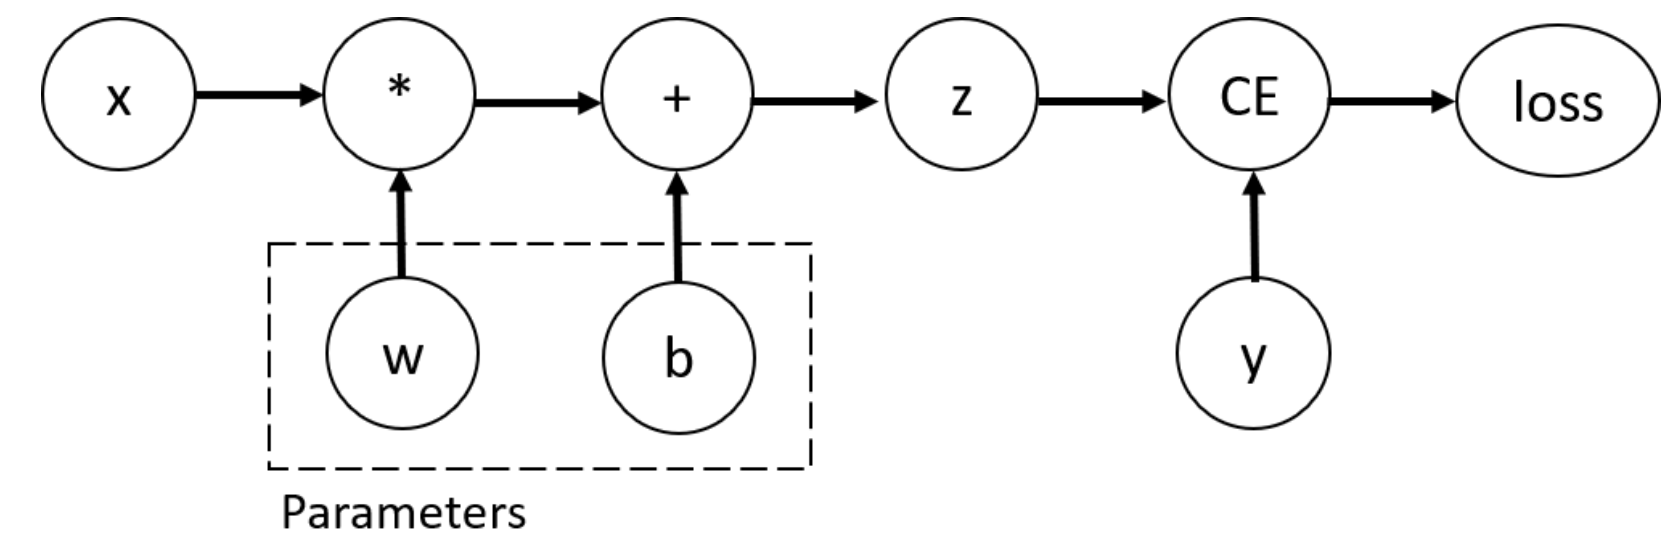

Функция, которую мы применяем к тензорам для построения вычислительного графа, на самом деле является объектом класса Function. Этот объект знает, как вычислить производную функции на этапе обратного распространения. Ссылка на функцию обратного распространения хранится в свойстве grad_fn тензора.

In [ ]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = None
Gradient function for loss = None


### Вычисление градиентов


Чтобы оптимизировать веса параметров в нейронной сети, нам необходимо вычислить производные нашей функции потерь по параметрам, а именно, нам нужно
$\frac{\partial loss}{\partial w}$ и
$\frac{\partial loss}{\partial b}$ при некоторых фиксированных значениях x и y. Чтобы вычислить эти производные, мы вызываем loss.backward(), а затем получаем значения из w.grad и b.grad:

In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

RuntimeError: ignored

### Отключение подсчета градиента

По умолчанию все тензоры с `require_grad=True` отслеживают историю своих вычислений и поддерживают вычисление градиента. Однако в некоторых случаях нам не нужно этого делать, например, когда мы обучили модель и просто хотим применить ее к некоторым входным данным. Мы можем отключить отслеживание вычислений, окружив наш вычислительный код блоком `torch.no_grad()`:

In [ ]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


ИЛИ используем `.detach()` метод:

In [ ]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

NameError: ignored

Есть несколько причин, по которым вам может потребоваться отключить отслеживание градиента:
- Заморозить некоторые параметры вашей сети и не обучать их
- Ускорить вычисления, когда вы выполняете только прямой проход, поскольку вычисления с тензорами, которые не отслеживают градиенты, будут более эффективными

**Задание (до 5 баллов)**<br>
Проделайте те же действия, но:
- Придумайте свою новую модель (+1 балла)
- Добавьте больше весов, чем у модели выше (+1 балл)
- Добавьте больше операций, чем у модели выше (+1 балл)
- Заморозьте часть весов (+1 балл)
- Изобразите вычислительный граф (можете использовать idroo/paint/лист бумаги/т.д.) (+1 балл)


In [2]:
import torch

data = [3, 5, 6.5, -7]
x = torch.tensor(data)  # входной тензор
y = torch.ones(4)  # ожидаемый тензор на выходе
w1 = torch.randn(4, 4, requires_grad=True)
w2 = torch.randn(4, 4, requires_grad=False)
b = torch.randn(4, requires_grad=True)

z1 = torch.matmul(x, w1)+b
z2 = torch.matmul(z1, w2)+b

z = z1 + z2
print(f"z: {z}\n")

loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)
print(f"loss: {loss}\n")

loss.backward()
print(w1.grad)
print(w2.grad)
print(b.grad)


z: tensor([ 0.2478,  3.9893,  8.9557, -3.9447], grad_fn=<AddBackward0>)

loss: 1.1398149728775024

tensor([[-0.4270, -0.4933,  0.3961,  0.2199],
        [-0.7116, -0.8222,  0.6601,  0.3665],
        [-0.9251, -1.0689,  0.8582,  0.4764],
        [ 0.9962,  1.1511, -0.9242, -0.5131]])
None
tensor([-0.2519, -0.1690,  0.1320, -0.1720])


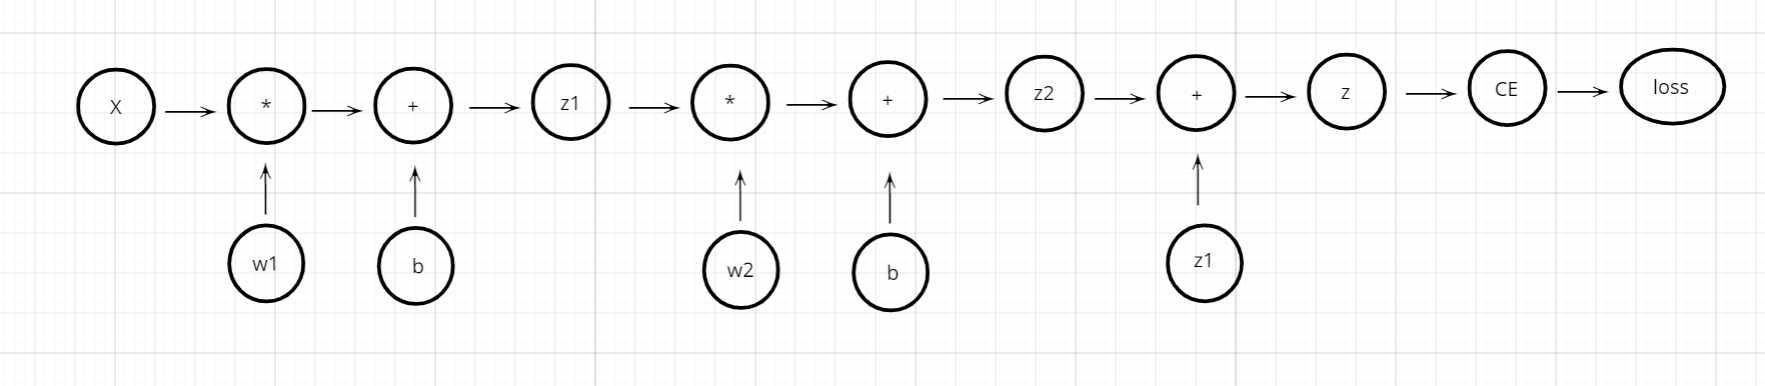